Importacion de librerias necesarias:

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score



Lectura del archivo extraido a partir del original proporcionado: 

In [3]:
df = pd.read_csv(r'Data/muestra_datos_completos.csv')
df.head()

,Unnamed: 0,dias_cursado,semestre_año,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,id_tarea,nombre_de_la_tarea,fecha_creacion_tarea,...,id_entrega_tarea,puntaje,formato_entrega,fecha_entrega,fecha_correccion,fecha_creacion_tarea.1,id_usuario,id_curso,nombre_curso,legajo
0,6672,31,1-2022,8.0,1.650240e+09,PRIMER PARCIAL(20),4.0,196656.0,Actividad Práctica Integradora 2 [API2],1.645736e+09,...,ee23ec3f-e6d4-4619-a7fc-893be97e185f,85.7,external_tool,1.650241e+09,1.650241e+09,1.659393e+09,598e46d0-4067-4017-85bd-d50240ff5dd7,bdae63a6-3624-41ee-a33f-24aa327a5a58,Re-engineered holistic structure,461884AEA
1,6673,31,1-2022,8.0,1.650240e+09,PRIMER PARCIAL(20),4.0,196656.0,Actividad Práctica Integradora 2 [API2],1.645736e+09,...,f9ac269c-a6d3-44e0-bb26-94f9d8055079,100.0,external_tool,1.650241e+09,1.650241e+09,1.659393e+09,598e46d0-4067-4017-85bd-d50240ff5dd7,bdae63a6-3624-41ee-a33f-24aa327a5a58,Re-engineered holistic structure,461884AEA
2,6674,31,1-2022,8.0,1.650240e+09,PRIMER PARCIAL(20),4.0,196656.0,Actividad Práctica Integradora 2 [API2],1.645736e+09,...,d552568e-12a3-4179-997d-6694470cf4c2,100.0,external_tool,1.650155e+09,1.650241e+09,1.659393e+09,598e46d0-4067-4017-85bd-d50240ff5dd7,bdae63a6-3624-41ee-a33f-24aa327a5a58,Re-engineered holistic structure,461884AEA
3,7707,21,1-2022,7.0,1.650413e+09,PRIMER PARCIAL(20),7.0,195070.0,Trabajo Práctico 1 [TP1],1.645728e+09,...,920cb6a7-9862-491a-885c-e93066fee2a5,70.0,online_upload,1.650320e+09,1.650733e+09,1.659393e+09,01103370-3046-4bc0-a8f8-85858ec0ec88,ef072dc2-cf38-4330-a10b-1786cd20da44,Public-key empowering attitude,532479OLL
4,8221,20,1-2022,8.0,1.649808e+09,PRIMER PARCIAL(20),4.0,205912.0,Trabajo Práctico 1 [TP1],1.647456e+09,...,11b0631d-33fb-4cc5-b297-8ac478d2eeb3,100.0,external_tool,1.649789e+09,1.649790e+09,1.659393e+09,caab837b-11cd-4a66-91eb-5db8b19aad50,8b2677ef-022b-4c7c-9d4e-afca3d7b51b9,Customer-focused multi-state open architecture,978968DKJ


cambiamos el formato de las columnas que contienen datos de fechas

In [293]:
columnas_fecha = ['fecha_entrega','fecha_correccion', 'fecha_creacion_tarea', 'fecha_mesa_epoch','vencimiento_tarea','apertura_tarea','cierre_tarea']

for columna in columnas_fecha:
    df[columna] = pd.to_datetime(df[columna], unit= 's')
    df[columna] = df[columna].dt.date

In [294]:
df.head()

,Unnamed: 0,dias_cursado,semestre_año,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,id_tarea,nombre_de_la_tarea,fecha_creacion_tarea,...,id_entrega_tarea,puntaje,formato_entrega,fecha_entrega,fecha_correccion,fecha_creacion_tarea.1,id_usuario,id_curso,nombre_curso,legajo
0,6672,31,1-2022,8.0,2022-04-18,PRIMER PARCIAL(20),4.0,196656.0,Actividad Práctica Integradora 2 [API2],2022-02-24,...,ee23ec3f-e6d4-4619-a7fc-893be97e185f,85.7,external_tool,2022-04-18,2022-04-18,1.659393e+09,598e46d0-4067-4017-85bd-d50240ff5dd7,bdae63a6-3624-41ee-a33f-24aa327a5a58,Re-engineered holistic structure,461884AEA
1,6673,31,1-2022,8.0,2022-04-18,PRIMER PARCIAL(20),4.0,196656.0,Actividad Práctica Integradora 2 [API2],2022-02-24,...,f9ac269c-a6d3-44e0-bb26-94f9d8055079,100.0,external_tool,2022-04-18,2022-04-18,1.659393e+09,598e46d0-4067-4017-85bd-d50240ff5dd7,bdae63a6-3624-41ee-a33f-24aa327a5a58,Re-engineered holistic structure,461884AEA
2,6674,31,1-2022,8.0,2022-04-18,PRIMER PARCIAL(20),4.0,196656.0,Actividad Práctica Integradora 2 [API2],2022-02-24,...,d552568e-12a3-4179-997d-6694470cf4c2,100.0,external_tool,2022-04-17,2022-04-18,1.659393e+09,598e46d0-4067-4017-85bd-d50240ff5dd7,bdae63a6-3624-41ee-a33f-24aa327a5a58,Re-engineered holistic structure,461884AEA
3,7707,21,1-2022,7.0,2022-04-20,PRIMER PARCIAL(20),7.0,195070.0,Trabajo Práctico 1 [TP1],2022-02-24,...,920cb6a7-9862-491a-885c-e93066fee2a5,70.0,online_upload,2022-04-18,2022-04-23,1.659393e+09,01103370-3046-4bc0-a8f8-85858ec0ec88,ef072dc2-cf38-4330-a10b-1786cd20da44,Public-key empowering attitude,532479OLL
4,8221,20,1-2022,8.0,2022-04-13,PRIMER PARCIAL(20),4.0,205912.0,Trabajo Práctico 1 [TP1],2022-03-16,...,11b0631d-33fb-4cc5-b297-8ac478d2eeb3,100.0,external_tool,2022-04-12,2022-04-12,1.659393e+09,caab837b-11cd-4a66-91eb-5db8b19aad50,8b2677ef-022b-4c7c-9d4e-afca3d7b51b9,Customer-focused multi-state open architecture,978968DKJ


eliminamos algunas columnas repetidas

In [295]:
df.drop(columns = ['Unnamed: 0', 'fecha_creacion_tarea.1'], inplace= True)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dias_cursado          391 non-null    int64  
 1   semestre_año          391 non-null    object 
 2   nota_final_materia    391 non-null    float64
 3   fecha_mesa_epoch      391 non-null    object 
 4   nombre_examen         391 non-null    object 
 5   nota_parcial          391 non-null    float64
 6   id_tarea              391 non-null    float64
 7   nombre_de_la_tarea    391 non-null    object 
 8   fecha_creacion_tarea  391 non-null    object 
 9   vencimiento_tarea     391 non-null    object 
 10  apertura_tarea        391 non-null    object 
 11  cierre_tarea          391 non-null    object 
 12  puntos_posibles       391 non-null    float64
 13  nombre_entrega        391 non-null    object 
 14  id_entrega_tarea      391 non-null    object 
 15  puntaje               3

verificamos si las columnas con fecha de iniciacion de una tarea, corresponden al semestre que se indica en esa fial 

In [297]:
# Convertir 'semestre_año' a semestre y año separados
df['semestre'] = df['semestre_año'].str.split('-').str[0].astype(int)
df['año'] = df['semestre_año'].str.split('-').str[1].astype(int)


In [298]:
def verificar_semestre(fecha, semestre, año):
    if semestre == 1:
        return fecha.month >= 1 and fecha.month <= 6 and fecha.year == año
    elif semestre == 2:
        return fecha.month >= 7 and fecha.month <= 12 and fecha.year == año
    else:
        return False  # Manejar cualquier otro caso si fuera necesario


In [299]:
columnas_fecha_iniciacion = ['fecha_creacion_tarea','apertura_tarea']

In [300]:
# Función para verificar si todas las fechas de una fila están en el semestre correcto
def verificar_todas_fechas_correctas(row):
    fechas_problema = []
    for columna in columnas_fecha_iniciacion:
        fecha = pd.to_datetime(row[columna], errors='coerce')
        if not verificar_semestre(fecha, row['semestre'], row['año']):
            fechas_problema.append(columna)
    return fechas_problema if fechas_problema else None

# Aplicar la función a cada fila del DataFrame
df['fechas_problema'] = df.apply(verificar_todas_fechas_correctas, axis=1)

# Filtrar las filas donde hay fechas problemáticas
filas_problema = df[df['fechas_problema'].notna()]

# Mostrar las filas problemáticas
if not filas_problema.empty:
    print("Fechas problemáticas encontradas en las siguientes filas:")
    print(filas_problema[columnas_fecha_iniciacion + ['semestre_año', 'fechas_problema']])
else:
    print('Todo está bien, ninguna fecha está mal')

Todo está bien, ninguna fecha está mal


In [301]:
df.drop(columns= ['semestre','año'], inplace=True)

In [302]:
df.describe(include= ['object'])

,semestre_año,fecha_mesa_epoch,nombre_examen,nombre_de_la_tarea,fecha_creacion_tarea,vencimiento_tarea,apertura_tarea,cierre_tarea,nombre_entrega,id_entrega_tarea,formato_entrega,fecha_entrega,fecha_correccion,id_usuario,id_curso,nombre_curso,legajo,fechas_problema
count,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,0
unique,2,30,5,12,17,21,3,21,22,320,5,40,57,164,115,113,164,0
top,1-2022,2022-04-11,PRIMER PARCIAL(20),Actividad Práctica Integradora 1 [API1],2022-02-24,2022-04-11,2022-03-21,2022-04-11,Trabajo Práctico 1 [TP1],1fafd0a6-7c58-4377-be82-def4f1d66b26,online_quiz,2022-05-02,2022-05-02,120199e7-7e5e-4415-9ba6-d7635bcb9ef3,2b274b15-83bb-4629-941e-fdc573af4e0b,Intuitive non-volatile ability,724054QKZ,NaN
freq,386,57,178,102,146,75,278,75,78,4,212,53,50,16,43,43,16,NaN


In [303]:
df.describe()

,dias_cursado,nota_final_materia,nota_parcial,id_tarea,puntos_posibles,puntaje
count,391.000000,391.000000,391.000000,391.000000,391.0,391.000000
mean,38.631714,7.094629,6.800512,202964.148338,100.0,81.810912
std,13.594208,1.689711,1.685869,5787.168221,0.0,19.066009
min,18.000000,3.000000,3.000000,191723.000000,100.0,0.000000
25%,29.000000,6.000000,5.000000,197154.000000,100.0,75.000000
50%,39.000000,7.000000,7.000000,202302.000000,100.0,85.000000
75%,52.000000,8.000000,8.000000,208630.000000,100.0,100.000000
max,57.000000,10.000000,10.000000,215217.000000,100.0,100.000000


se observan que los datos de las entregas y los id de las mismas no son iguales en cantidad por lo que se procede a estudiar como se encuentran compuestos: 

In [304]:
tarea_id_entrega = df.groupby('nombre_entrega')['id_entrega_tarea'].nunique()
tarea_id_entrega_multiple =  tarea_id_entrega[tarea_id_entrega > 1]

print('tareas con multiple id:' , tarea_id_entrega_multiple)

tareas con multiple id: nombre_entrega
Actividad Práctica Integradora 1 [API1]    19
Actividad Práctica Integradora 2 [API2]    37
Actividad Práctica Integradora 3 [API3]    14
Actividad Práctica Integradora 4 [API4]    18
Actividad práctica integradora [API1]       2
Actividad práctica integradora [API2]       2
Evaluación diagnóstica                      4
Trabajo Práctico 1 [TP1]                   69
Trabajo Práctico 2 [TP2]                   57
Trabajo Práctico 3 - Avanzado [TP3]         5
Trabajo Práctico 3 - Diagnóstico [ED3]      5
Trabajo Práctico 3 [TP3]                   28
Trabajo Práctico 4 - Avanzado [TP4]         4
Trabajo Práctico 4 - Diagnóstico [ED4]      3
Trabajo Práctico 4 [TP4]                   39
Trabajo práctico 1 [TP1]                    4
Trabajo práctico 2 [TP2]                    3
Trabajo práctico 3 [TP3]                    2
Trabajo práctico 4 [TP4]                    2
Name: id_entrega_tarea, dtype: int64


tomamos como ejemplo la primer tarea 'Actividad Práctica Integradora 1 [API1]' para saber si la cantidad de id asignado corresponde con la cantidad de entregas que existen de alumnos que entregaron esta tarea:

In [305]:
entregas_API1 = df[df['nombre_de_la_tarea'] == 'Actividad Práctica Integradora 1 [API1]']

# Contar el número de filas, que representa el número de estudiantes que entregaron la API1
num_entregas_API1 = entregas_API1.shape[0]

In [306]:
#  legajos de los estudiantes que entregaron la API1 y contar el numero de filas
entregas_API1_info = entregas_API1[['legajo']].copy()
entregas_API1_info['count'] = 1  # se agrega una columna para contar

# mostrar el resultado
print("Legajos de los estudiantes que entregaron la API1 y conteo:")
print(entregas_API1_info)

# Contar el numero total de estudiantes que entregaron la API1
num_entregas_API1 = entregas_API1.shape[0]
print('El número total de estudiantes que entregaron la API1 es:')
num_entregas_API1

Legajos de los estudiantes que entregaron la API1 y conteo:
        legajo  count
5    944115CWD      1
25   196383SWJ      1
26   004847XRK      1
27   928354TFY      1
28   042241DWP      1
..         ...    ...
386  694401ZAK      1
387  694401ZAK      1
388  694401ZAK      1
389  817962JMH      1
390  817962JMH      1

[102 rows x 2 columns]
El número total de estudiantes que entregaron la API1 es:


102

como se observa, existen 102 alumnos que entregaron la tarea 'Actividad Práctica Integradora 1 [API1]' y 19 id para esta actividad. Esto refleja una discrepancia en los datos y los registros al momento de cargarlos. 

In [307]:
df['nombre_examen'].value_counts()

nombre_examen
PRIMER PARCIAL(20)                   178
SEGUNDO PARCIAL(20)                   99
INTEGRADOR(30)                        55
RECUPERATORIO PRIMER PARCIAL(20)      41
RECUPERATORIO SEGUNDO PARCIAL(20)     18
Name: count, dtype: int64

In [308]:
df['nombre_de_la_tarea'].value_counts()

nombre_de_la_tarea
Actividad Práctica Integradora 1 [API1]    102
Actividad Práctica Integradora 3 [API3]     56
Trabajo Práctico 1 [TP1]                    55
Trabajo Práctico 2 [TP2]                    39
Actividad Práctica Integradora 4 [API4]     36
Actividad Práctica Integradora 2 [API2]     35
Trabajo Práctico 4 [TP4]                    29
Trabajo Práctico 3 [TP3]                    23
Actividad práctica integradora [API2]        6
Actividad práctica integradora [API1]        5
Actividad práctica integradora [API3]        4
Trabajo Práctico 1 [TP1]                     1
Name: count, dtype: int64

In [309]:
df['nombre_entrega'].value_counts()

nombre_entrega
Trabajo Práctico 1 [TP1]                         78
Trabajo Práctico 2 [TP2]                         77
Trabajo Práctico 4 [TP4]                         51
Trabajo Práctico 3 [TP3]                         49
Actividad Práctica Integradora 2 [API2]          37
Actividad Práctica Integradora 4 [API4]          19
Actividad Práctica Integradora 1 [API1]          19
Actividad Práctica Integradora 3 [API3]          15
Trabajo Práctico 3 - Diagnóstico [ED3]            7
Trabajo Práctico 3 - Avanzado [TP3]               6
Evaluación diagnóstica                            5
Trabajo Práctico 4 - Avanzado [TP4]               5
Trabajo Práctico 4 - Diagnóstico [ED4]            4
Trabajo práctico 1 [TP1]                          4
Trabajo práctico 2 [TP2]                          3
Actividad práctica integradora [API1]             2
Actividad práctica integradora [API2]             2
Trabajo práctico 4 [TP4]                          2
Trabajo práctico 3 [TP3]                         

In [310]:
df['formato_entrega'].value_counts()

formato_entrega
online_quiz          212
external_tool         89
online_upload         63
basic_lti_launch      26
online_text_entry      1
Name: count, dtype: int64

buscamos relaciones entre las variables para estudiar si tiene significancia en las notas finales las diferentes variables incluidas

In [311]:
# Calcular la matriz de correlación
correlation_matrix = df[['dias_cursado', 'nota_final_materia', 'puntos_posibles', 'puntaje']].corr()

print("Matriz de correlación:")
correlation_matrix

Matriz de correlación:


,dias_cursado,nota_final_materia,puntos_posibles,puntaje
dias_cursado,1.000000,-0.447442,NaN,-0.256958
nota_final_materia,-0.447442,1.000000,NaN,0.380133
puntos_posibles,NaN,NaN,NaN,NaN
puntaje,-0.256958,0.380133,NaN,1.000000


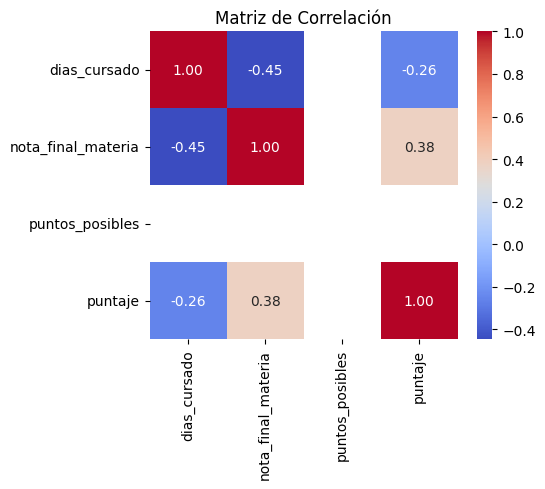

In [312]:
# tamaño del gráfico
plt.figure(figsize=(5, 4))

# mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# título al gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

existe una relación positiva moderada entre las notas finales de la materia y el puntaje, sugiriendo que los estudiantes con mejores notas finales también tienden a tener mejores puntajes en sus tareas.

si bien hay una relación negativa moderada entre los días cursados y la nota final de la materia, lo que podría indicar que un mayor número de días cursados no necesariamente se traduce en mejores notas finales, recordamos que los dias cursados es una variable cuantitativa discreta que simplemente asigna numeros en orden a los dias. 

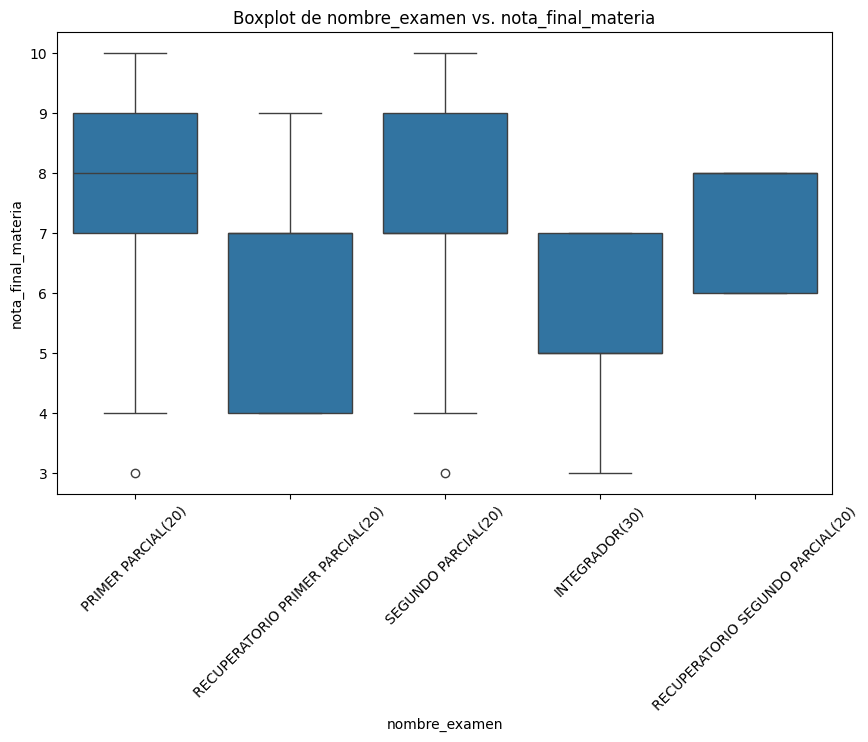

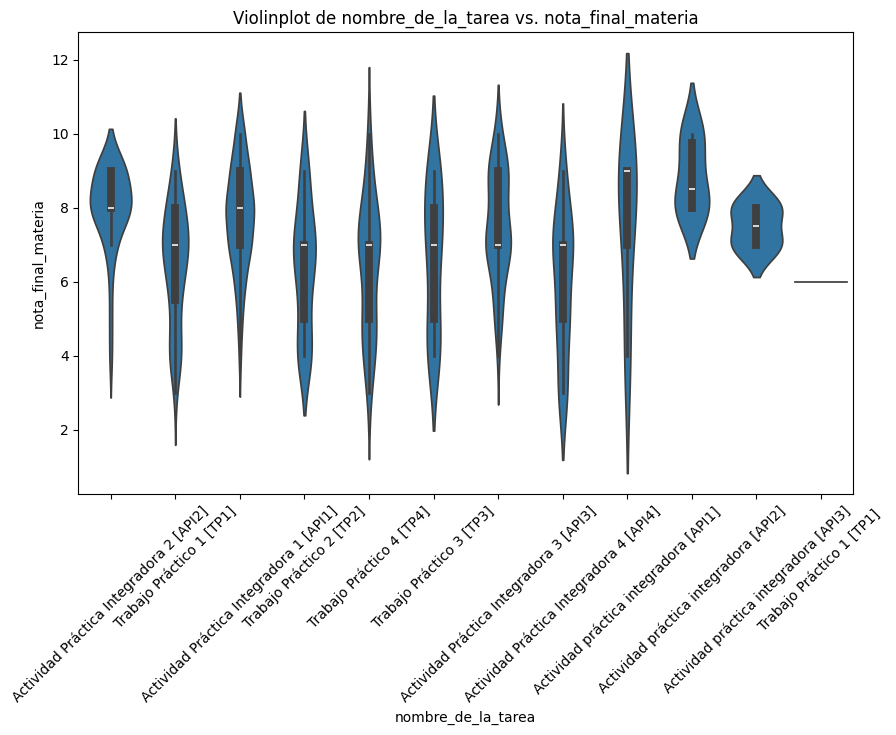

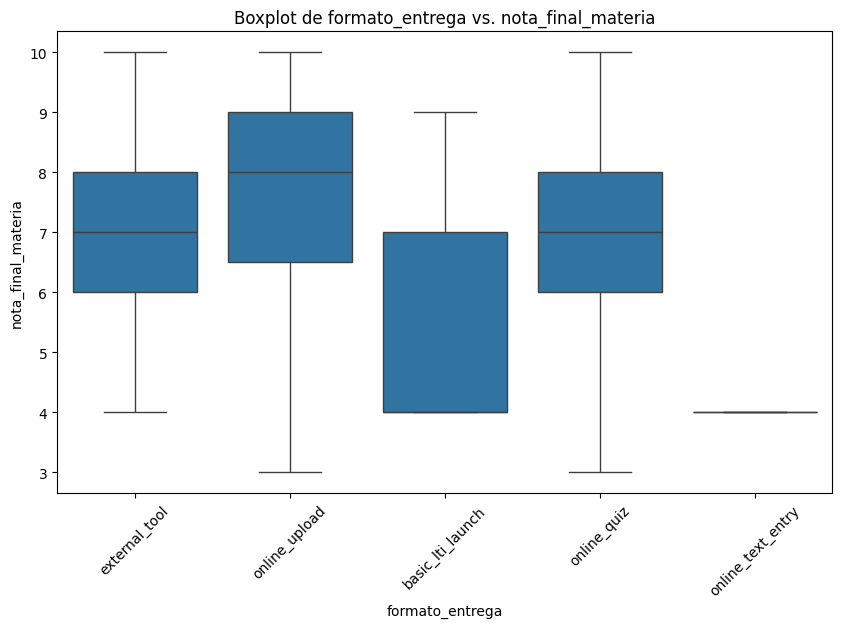

In [313]:
# Boxplot para nombre_examen vs. nota_final_materia
plt.figure(figsize=(10, 6))
sns.boxplot(x='nombre_examen', y='nota_final_materia', data=df)
plt.title('Boxplot de nombre_examen vs. nota_final_materia')
plt.xticks(rotation=45)
plt.show()

# Violinplot para nombre_de_la_tarea vs. nota_final_materia
plt.figure(figsize=(10, 6))
sns.violinplot(x='nombre_de_la_tarea', y='nota_final_materia', data=df)
plt.title('Violinplot de nombre_de_la_tarea vs. nota_final_materia')
plt.xticks(rotation=45)
plt.show()

# Boxplot para formato_entrega vs. nota_final_materia
plt.figure(figsize=(10, 6))
sns.boxplot(x='formato_entrega', y='nota_final_materia', data=df)
plt.title('Boxplot de formato_entrega vs. nota_final_materia')
plt.xticks(rotation=45)
plt.show()


In [314]:
# ANOVA para nombre_examen vs. nota_final_materia
model = ols('nota_final_materia ~ nombre_examen', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA para nombre_examen vs. nota_final_materia:")
print(anova_table)



ANOVA para nombre_examen vs. nota_final_materia:
                   sum_sq     df          F        PR(>F)
nombre_examen  288.788159    4.0  33.791319  3.492382e-24
Residual       824.710562  386.0        NaN           NaN


H0 = las medias de nota_final_materia son iguales para todos los niveles de nombre_examen.

H1 = Al menos una de las medias de nota_final_materia es diferente para algún nivel de nombre_examen. (hay al menos un examen para el cual la media de las notas finales de la materia es significativamente diferente de los otros.)

un f alto indica que hay una diferencia significativa entre las medias de la nota final de la materia y el nombre de examen, es decir, es muy probable que el nombre del examen tenga un efecto real en la nota final de la materia ; ademas observamos un valor p es bastante bajo rechazamos la hipotesis nula (H0), lo que indica que el nombre del examen tiene significancia en la nota final de la materia. 

In [315]:
# ANOVA para nombre_de_la_tarea vs. nota_final_materia
model = ols('nota_final_materia ~ nombre_de_la_tarea', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA para nombre_de_la_tarea vs. nota_final_materia:")
print(anova_table)



ANOVA para nombre_de_la_tarea vs. nota_final_materia:
                        sum_sq     df         F        PR(>F)
nombre_de_la_tarea  198.849368   11.0  7.490591  1.123012e-11
Residual            914.649353  379.0       NaN           NaN


H0 = No hay diferencia en las medias de nota_final_materia entre los diferentes nombre_de_la_tarea

H1 = Hay al menos una diferencia en las medias de nota_final_materia entre los diferentes nombre_de_la_tarea

es muy poco probable que todas las tareas tengan, en promedio, las mismas notas finales. El valor de F es bastante alto, y el valor p es extremadamente bajo, lo que significa que el tipo de tarea que se asigna a los estudiantes influye de manera significativa en las notas finales que ellos obtienen.Esto significa que algunas tareas pueden ser más difíciles o más fáciles que otras, lo que lleva a diferencias notables en las notas finales de los estudiantes dependiendo de la tarea que se les asignó

In [316]:
# ANOVA para formato_entrega vs. nota_final_materia
model = ols('nota_final_materia ~ formato_entrega', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA para formato_entrega vs. nota_final_materia:")
print(anova_table)


ANOVA para formato_entrega vs. nota_final_materia:
                      sum_sq     df         F        PR(>F)
formato_entrega    98.740915    4.0  9.389924  2.984377e-07
Residual         1014.757806  386.0       NaN           NaN


H0 =  No hay diferencia en las medias de nota_final_materia entre los diferentes formato_entrega

H1 = Hay al menos una diferencia en las medias de nota_final_materia entre los diferentes formato_entrega

es muy poco probable que todos los formatos de entrega tengan, en promedio, las mismas notas finales. El valor de F es bastante alto, y el valor p  es extremadamente bajo, lo que significa que las diferencias en las notas finales entre los diferentes formatos de entrega no son debidas al azar. En otras palabras, el formato de entrega que se utiliza para las tareas influye de manera significativa en las notas finales que obtienen los estudiantes.

---

Luego del analisis de la muestra extraida a partir del Data set original, de los datos que se encontraban completos tanto filas como columnas, se decide analizar para encontrar relaciones en un caso ideal en el que el Data Set se encontrara sin datos nulos. En este caso se realizaron tecnicas estadisticas para encontrar relacion entre variables y desarrollar a partir de este nuevas variables que se pueden considerar importantes para medir el rendimiento del alumno. Estas son:
* duracion_tarea 
* horas_estudio

y asi medir la significancia en la nota final y poder llegar a predecir esta variable

---

In [318]:
df.columns

Index(['dias_cursado', 'semestre_año', 'nota_final_materia',
       'fecha_mesa_epoch', 'nombre_examen', 'nota_parcial', 'id_tarea',
       'nombre_de_la_tarea', 'fecha_creacion_tarea', 'vencimiento_tarea',
       'apertura_tarea', 'cierre_tarea', 'puntos_posibles', 'nombre_entrega',
       'id_entrega_tarea', 'puntaje', 'formato_entrega', 'fecha_entrega',
       'fecha_correccion', 'id_usuario', 'id_curso', 'nombre_curso', 'legajo',
       'fechas_problema'],
      dtype='object')

In [319]:
# Convertir las columnas de fecha a formato datetime
df['apertura_tarea'] = pd.to_datetime(df['apertura_tarea'])
df['cierre_tarea'] = pd.to_datetime(df['cierre_tarea'])

In [320]:
# Calcular la duración de la tarea en días
df['duracion_tarea'] = (df['cierre_tarea'] - df['apertura_tarea']).dt.days


In [321]:
#verificar los primeros registros para asegurarse de que la columna se ha creado correctamente
print(df[['apertura_tarea', 'cierre_tarea', 'duracion_tarea']].head())

  apertura_tarea cierre_tarea  duracion_tarea
0     2022-03-21   2022-04-18              28
1     2022-03-21   2022-04-18              28
2     2022-03-21   2022-04-18              28
3     2022-03-21   2022-04-19              29
4     2022-03-21   2022-04-12              22


In [322]:
# preparamos los datos para el modelo
# Seleccionamos las características y la variable objetivo
features = ['semestre_año', 'nota_parcial', 'duracion_tarea']
X = df[features]
y = df['nota_final_materia']

In [323]:
# Codificación de variables categóricas
X = pd.get_dummies(X, columns=['semestre_año'], drop_first=True)


In [324]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [325]:
# modelo de regresión lineal

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [326]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [327]:
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 1.3803661366243358
R2 Score: 0.5358952423479946


In [331]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)

# búsqueda de hiperparámetros para optimizar el modelo
# Los valores elegidos son comúnmente utilizados en la práctica y suelen proporcionar un buen punto de partida para la búsqueda de hiperparámetros.
param_grid = {
    'n_estimators': [100, 200, 300], # valores comunes que ofrecen un buen equilibrio entre rendimiento y tiempo de computación.
    'max_depth': [10, 20, 30, None], # limitar la profundidad de los árboles puede prevenir el sobreajuste
    'min_samples_split': [2, 5, 10], # 2 es el valor por defecto, y 5 y 10 son valores que ayudan a evitar divisiones basadas en pequeñas cantidades de datos, reduciendo el riesgo de sobreajuste
    'min_samples_leaf': [1, 2, 4] # 1 es el valor por defecto, y 2 y 4 son valores que permiten una mayor regularización del modelo.
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo usando cross validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='r2')
print(f'Average R2 Score with cross-validation: {np.mean(cv_scores)}')

# Entrenar el mejor modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Average R2 Score with cross-validation: 0.32777711302920187
Random Forest MSE: 0.7767863753794975
Random Forest R2 Score: 0.7388299792875942


               Feature  Importance
0         nota_parcial    0.805941
1       duracion_tarea    0.175070
2  semestre_año_1-2022    0.018989


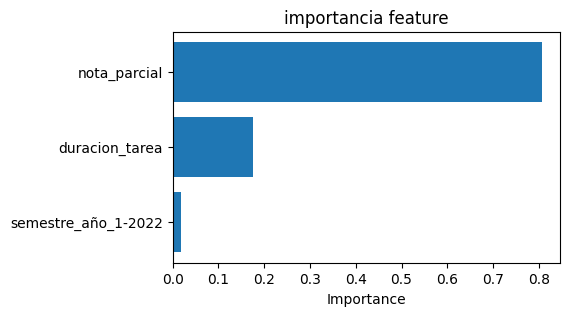

In [334]:
# Importancia de las características
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Crear un df para visualizar las importancias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Graficar las importancias de las características
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('importancia feature')
plt.gca().invert_yaxis()
plt.show()

In [337]:
# Eliminar la columna duracion_tarea
X_sin_duracion = X.drop(columns=['duracion_tarea'])

# Dividir los datos
X_train_sin, X_test_sin, y_train_sin, y_test_sin = train_test_split(X_sin_duracion, y, test_size=0.2, random_state=42)

# Entrenar el mejor modelo con los datos de entrenamiento
best_rf_model.fit(X_train_sin, y_train_sin)

# Predicciones y evaluación del modelo
y_pred_rf_sin = best_rf_model.predict(X_test_sin)
mse_rf_sin = mean_squared_error(y_test_sin, y_pred_rf_sin)
r2_rf_sin = r2_score(y_test_sin, y_pred_rf_sin)

print(f'Sin duracion_tarea - Random Forest MSE: {mse_rf_sin}')
print(f'Sin duracion_tarea - Random Forest R2 Score: {r2_rf_sin}')


Sin duracion_tarea - Random Forest MSE: 0.9210746556289978
Sin duracion_tarea - Random Forest R2 Score: 0.6903454575640716


Los resultados muestran una mejora significativa en el rendimiento del modelo Random Forest comparado con el modelo de regresión lineal. El R2 Score del modelo Random Forest es aproximadamente 0.74, lo que indica que el modelo explica el 73.9% de la variabilidad en la nota_final_materia. El MSE también ha mejorado a aproximadamente 0.78.

*Error Cuadrático Medio (MSE):*
* Con duracion_tarea: 0.7768
* Sin duracion_tarea: 0.9211

Conclusión: El MSE es menor cuando se incluye duracion_tarea, lo que indica que el modelo es más preciso con esta variable.

*Coeficiente de Determinación (R2 Score):*
* Con duracion_tarea: 0.7388
* Sin duracion_tarea: 0.6903

Conclusión: El R2 Score es mayor cuando se incluye duracion_tarea, lo que indica que el modelo explica mejor la variabilidad de los datos con esta variable

In [ ]:
df.to_csv('muestra_datos.csv')